In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
df = pd.read_csv(os.path.abspath('../data/Nal_filtre_FLX_NEE_01012011_31122017.csv'), encoding = "ISO-8859-1", sep = ';')
# df = pd.read_csv(os.path.abspath('../data/Nal_filtre_FLX_NEE_01012007_31122010.csv'), encoding = "ISO-8859-1", sep = ';')

C:\Users\owner\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0,2,3,4,5,6,7,8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


---

In [3]:
df.head(5)

,hour (numeric),Date (dd/mm/yyyy hh:mm),Net Ecosystem Exchange which is the CO2 (umol/m2/s),Friction Velocity (m/s),Incoming shortwave radiation (W/m2),Air temperature (°C),Water vapor deficit (kpa),Soil temperature at 10 cm below the surface (°C),Soil moisture at 10 cm below the surface (cm3/cm3),Soil moisture at 30 cm below the surface (cm3/cm3)
0,heure,DateUTC,NEE,Ustar,Swin,T_meteo,VPD,Tsol1_10,Hv1,Hv2
1,0,01/01/2011 00:00,NaN,0.23159,NaN,NaN,NaN,NaN,0.038,0.056
2,0.5,01/01/2011 00:30,NaN,0.20874,-3.113,18.64,1.569496568,27.385,0.038,0.056
3,1,01/01/2011 01:00,NaN,0.17778,-3.181,17.785,1.453069295,27.14,0.038,0.056
4,1.5,01/01/2011 01:30,NaN,0.1663,-2.4925,17.635,1.424169175,26.9,0.038,0.056


---

In [4]:
print(df.columns)

Index(['hour (numeric)', 'Date (dd/mm/yyyy hh:mm)',
       'Net Ecosystem Exchange  which is the CO2 (umol/m2/s)',
       'Friction Velocity (m/s)', 'Incoming shortwave radiation (W/m2)',
       'Air temperature (°C)', 'Water vapor deficit (kpa)',
       'Soil temperature at 10 cm below the surface (°C)',
       'Soil moisture at 10 cm below the surface (cm3/cm3)',
       'Soil moisture at 30 cm below the surface (cm3/cm3)'],
      dtype='object')


---

fixing the name to be the 1st row

In [5]:
df.columns = df.iloc[0] # fix the col names to be the 1st col
df = df.iloc[1:] # fix the col names to be the 1st col

In [6]:
df.head(2)

,heure,DateUTC,NEE,Ustar,Swin,T_meteo,VPD,Tsol1_10,Hv1,Hv2
1,0,01/01/2011 00:00,NaN,0.23159,NaN,NaN,NaN,NaN,0.038,0.056
2,0.5,01/01/2011 00:30,NaN,0.20874,-3.113,18.64,1.569496568,27.385,0.038,0.056


---

In [7]:
df.shape
# why all of them of typoe object (it should be float64)

(122736, 10)

---

In [8]:
df.describe()

,heure,DateUTC,NEE,Ustar,Swin,T_meteo,VPD,Tsol1_10,Hv1,Hv2
count,122736,122736,56232,67447.00000,108811.0,109725.0,107369,88142.0,114042,116410
unique,96,122736,56232,47791.00000,48224.0,30171.0,91187,6202.0,354,385
top,0,01/01/2011 00:00,-0.011749636,0.06387,-1.0,0.0,4.388121134,28.0,0.035,0.053
freq,1366,1,1,7.00000,640.0,2356.0,201,349.0,3311,3142


---

Changing the type from object to float.

we need to change the following [2:] to float64

In [9]:
df.iloc[:, 2:] = df.iloc[:, 2:].astype(float)
df

,heure,DateUTC,NEE,Ustar,Swin,T_meteo,VPD,Tsol1_10,Hv1,Hv2
1,0,01/01/2011 00:00,NaN,0.23159,NaN,NaN,NaN,NaN,0.038,0.056
2,0.5,01/01/2011 00:30,NaN,0.20874,-3.113,18.64,1.569497,27.385,0.038,0.056
3,1,01/01/2011 01:00,NaN,0.17778,-3.181,17.785,1.453069,27.14,0.038,0.056
4,1.5,01/01/2011 01:30,NaN,0.1663,-2.4925,17.635,1.424169,26.9,0.038,0.056
5,2,01/01/2011 02:00,NaN,0.20026,-2.4065,17.65,1.420469,26.645,0.038,0.056
...,...,...,...,...,...,...,...,...,...,...
122732,21.5,31/12/2017 21:30,NaN,NaN,-3.6,22.6,1.968886,NaN,0.036,0.058
122733,22.0,31/12/2017 22:00,NaN,NaN,-3.4,22.1,1.891324,NaN,0.036,0.058
122734,22.5,31/12/2017 22:30,NaN,NaN,-3.5,21.5,1.807916,NaN,0.036,0.058
122735,23.0,31/12/2017 23:00,NaN,NaN,-3.3,21.2,1.764923,NaN,0.036,0.058


---

<b><i> Standard Scaler </i></b> 

In [11]:
from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()
scaled_arr = scaler.fit_transform(df.iloc[:, 2:])
df.iloc[:, 2:]= pd.DataFrame(scaled_arr, columns = df.columns[2:])
# df_scaled[]
df

,heure,DateUTC,NEE,Ustar,Swin,T_meteo,VPD,Tsol1_10,Hv1,Hv2
1,0,01/01/2011 00:00,NaN,0.035532,NaN,NaN,NaN,NaN,-0.897683,-0.93539
2,0.5,01/01/2011 00:30,NaN,-0.121492,-0.736318,-1.087896,0.02115,-0.650719,-0.897683,-0.93539
3,1,01/01/2011 01:00,NaN,-0.334247,-0.736544,-1.231436,-0.067571,-0.71873,-0.897683,-0.93539
4,1.5,01/01/2011 01:30,NaN,-0.413137,-0.734256,-1.256619,-0.089594,-0.785353,-0.897683,-0.93539
5,2,01/01/2011 02:00,NaN,-0.179766,-0.73397,-1.254101,-0.092414,-0.856141,-0.897683,-0.93539
...,...,...,...,...,...,...,...,...,...,...
122732,21.5,31/12/2017 21:30,NaN,NaN,-0.737936,-0.423075,0.325498,NaN,-0.950778,-0.886996
122733,22.0,31/12/2017 22:00,NaN,NaN,-0.737271,-0.507017,0.266393,NaN,-0.950778,-0.886996
122734,22.5,31/12/2017 22:30,NaN,NaN,-0.737604,-0.607748,0.202833,NaN,-0.950778,-0.886996
122735,23.0,31/12/2017 23:00,NaN,NaN,-0.736939,-0.658113,0.170072,NaN,-0.950778,-0.886996


---

### Additional data processing operations:

1. Convert to numpy for ease of data manipulation
2. Convert outliers to nan's
3. Identify locations where nan's occur
4. Create copy of data with nan's replaced with 0.

In [18]:
X = df.iloc[:, 2:].to_numpy()
X = X.astype(float)

# Matrix shape
(nx, nc) = np.shape(X)

# Change outliers to nans
Xout = np.abs(X)>4
X[Xout] = float("nan")
X[Xout] = float("nan")

# Logical matrix that gives locations of nan's
Xnan = np.isnan(X)
# Replace nan's with 0
X0 = np.copy(X)
X0[Xnan] = 0
# Integer matrix that indicates data locations
Xan = 1 - Xnan.astype(int)

### Plots of standardized data for each variable

In [ ]:
# Set range of data indices
dataIx = np.arange(nx)

for jj,col in enumerate(df.columns[2:]):
    plt.plot(dataIx,X[dataIx,jj])
    nanLoc = np.array(np.where(Xnan[dataIx,jj]))[0,:]
    print("Number of missing data points in \
          "+ col +"; " + str(len(nanLoc)))
    plt.plot(nanLoc,0*nanLoc,'r.')   
    plt.title('Standardized data: '+ col)
    plt.show()

### Create bivariate scatter diagrams

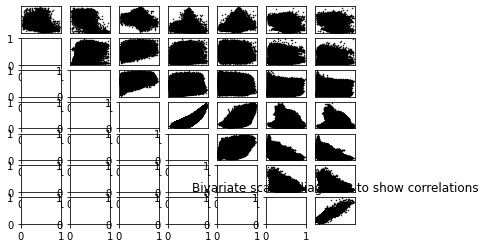

In [25]:
fig, axs = plt.subplots(nc-1, nc-1)
for jj in range(nc):
    for kk in range(jj+1,nc):
        axs[jj, kk-1].scatter(X[:,jj], X[:,kk],c='k',s=0.25)
        axs[jj, kk-1].get_xaxis().set_visible(False)
        axs[jj, kk-1].get_yaxis().set_visible(False)
#        titleString = str(jj)+' vs '+str(kk)
#        axs[jj, kk].set_title('Axis [0, 0]')
plt.show()

### Compute correlations:
*  Compute vector inner product between columns by taking X^T @X (with nan's replaced by 0's)
* Find number of nontrivial products by taking Xan^T @ Xan
*  Pointwise divide to find correlations

In [27]:
Xcov = (X0.transpose()@ X0) / (Xan.transpose() @ Xan)
print(Xcov)
# Find eigenvectors and eigenvalues
from numpy import linalg as LA
lam,eVec = LA.eigh(Xcov)

[[ 0.92332221 -0.39139138 -0.6489849  -0.20059672 -0.09064925  0.15067523
  -0.18602636 -0.19606976]
 [-0.39139138  0.92849699  0.68128565  0.3686059   0.37402883  0.04392832
  -0.06922883 -0.05932406]
 [-0.6489849   0.68128565  1.          0.48352959  0.46433432  0.02817927
  -0.04062355 -0.04691754]
 [-0.20059672  0.3686059   0.48352959  0.63168185  0.61875566  0.50546622
  -0.20381216 -0.21695403]
 [-0.09064925  0.37402883  0.46433432  0.61875566  1.          0.53324686
  -0.58859076 -0.59972867]
 [ 0.15067523  0.04392832  0.02817927  0.50546622  0.53324686  1.
  -0.41446839 -0.42716519]
 [-0.18602636 -0.06922883 -0.04062355 -0.20381216 -0.58859076 -0.41446839
   0.99869956  0.94330816]
 [-0.19606976 -0.05932406 -0.04691754 -0.21695403 -0.59972867 -0.42716519
   0.94330816  0.99872057]]


### Plots that show seasonality

C:\Users\owner\AppData\Local\Temp/ipykernel_15408/2005102552.py:8: RuntimeWarning: Mean of empty slice
  Xvals = np.nanmean(Xvals, axis=0)


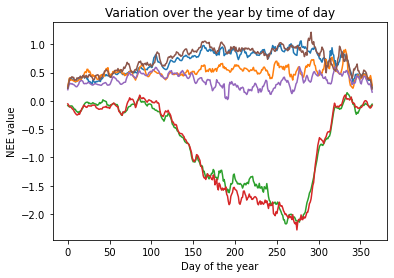

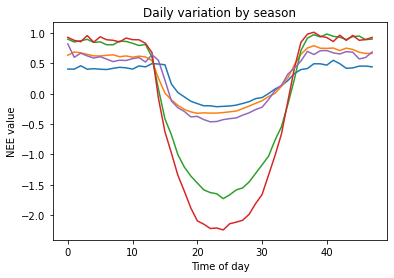

In [29]:
ns = 5 # Number of seasons
nt = 6 # Number of times of day
kSize = 5 # For smoothing
kernel = np.ones(kSize)/kSize
Xvals = X[:,0]
Xvals = Xvals[:365*(len(Xvals)//365)]
Xvals = np.reshape(Xvals,(-1,365,48))
Xvals = np.nanmean(Xvals, axis=0)

Xt = np.reshape(Xvals,(-1,nt,48//nt))
Xt = np.nanmean(Xt,axis=2)
for jt in range(nt):
    plt.plot(np.arange(365),np.convolve(Xt[:,jt],kernel,mode = 'same'),'-')
plt.title('Variation over the year by time of day')
plt.xlabel('Day of the year')
plt.ylabel('NEE value')
plt.show()

Xs = np.reshape(Xvals,(ns,-1,48))
Xs = np.nanmean(Xs,axis=1)
for js in range(ns):
    plt.plot(np.arange(48),Xs[js,:],'-')
plt.title('Daily variation by season')
plt.xlabel('Time of day')
plt.ylabel('NEE value')
plt.show()

### Find distribution of data gaps and consecutive data runs.


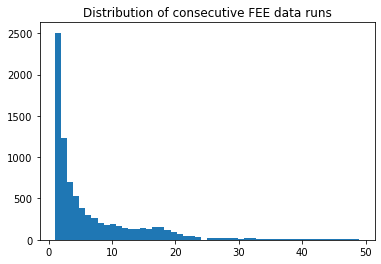

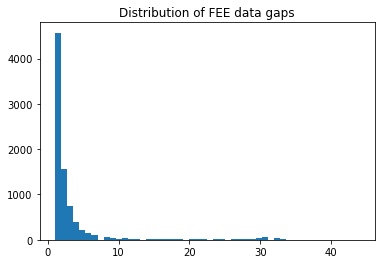

In [30]:
wXnan = np.where(Xnan[:,0])[0]
wXnanDiff = wXnan[1:]-wXnan[:-1]-1
wXnanDiff = wXnanDiff[wXnanDiff>0]
wXnanDiff = wXnanDiff[wXnanDiff<50]
plt.hist(wXnanDiff,bins=50)
plt.title("Distribution of consecutive FEE data runs")
plt.show()

wXan = np.where(Xan[:,0])[0]
wXanDiff = wXan[1:]-wXan[:-1]-1
wXanDiff = wXanDiff[wXanDiff>0]
wXanDiff = wXanDiff[wXanDiff<50]
plt.hist(wXanDiff,bins=50)
plt.title("Distribution of FEE data gaps")
plt.show()